In [41]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
from naloga import MaksimalnaEntropija, fourier_transform, okna

plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set2.colors)

## 1. Metoda maksimalne entropije

Naplotam fourierovo transformacijo za primerjavo

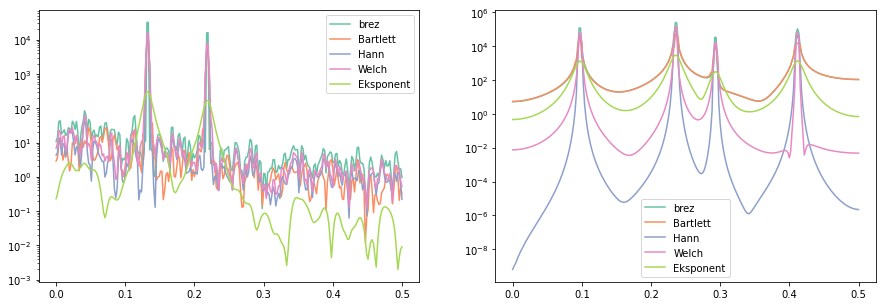

In [3]:
val2 = np.loadtxt("val2.dat")
val3 = np.loadtxt("val3.dat")

ft_val2 = fourier_transform(val2)
ft_val3 = fourier_transform(val3)

P21 = ft_val2.MOC()
P22 = ft_val2.MOC(okna.bartlett)
P23 = ft_val2.MOC(okna.hann)
P24 = ft_val2.MOC(okna.welch)
P25 = ft_val2.MOC(okna.eksponent)

P31 = ft_val3.MOC()
P32 = ft_val3.MOC(okna.bartlett)
P33 = ft_val3.MOC(okna.hann)
P34 = ft_val3.MOC(okna.welch)
P35 = ft_val3.MOC(okna.eksponent)

fig, ax = plt.subplots(1,2)

x = np.linspace(0, 0.5, 256)

ax[0].plot(x, P21, label="brez")
ax[0].plot(x, P22, label="Bartlett")
ax[0].plot(x, P23, label="Hann")
ax[0].plot(x, P24, label="Welch")
ax[0].plot(x, P25, label="Eksponent")

ax[1].plot(x, P31, label="brez")
ax[1].plot(x, P32, label="Bartlett")
ax[1].plot(x, P33, label="Hann")
ax[1].plot(x, P34, label="Welch")
ax[1].plot(x, P35, label="Eksponent")

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()

plt.show()

Metoda maksimalne entropije:

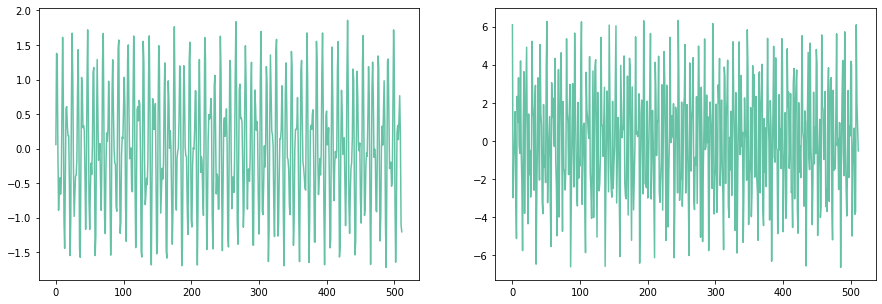

In [4]:
val2 = np.loadtxt("val2.dat")
val3 = np.loadtxt("val3.dat")
x2 = np.asarray(range(val2.size))
x3 = np.asarray(range(val3.size))

val2_mem = MaksimalnaEntropija(val2)
val3_mem = MaksimalnaEntropija(val3)

fig, ax = plt.subplots(1,2)

ax[0].plot(x2, val2)
ax[1].plot(x3, val3)

plt.show()

različni parametri p

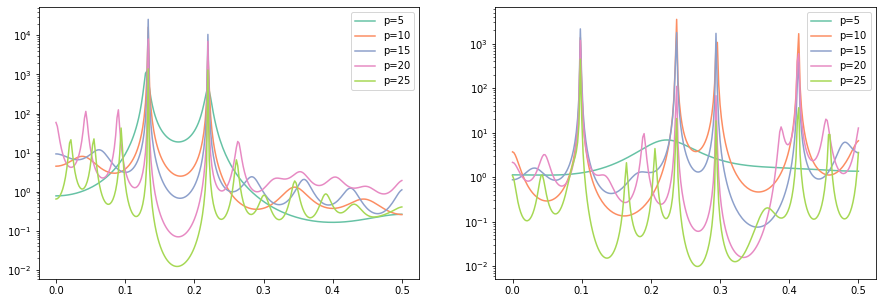

In [5]:
data2 = val2
data3 = val3
pis = [5, 10, 15, 20, 25]

fig, ax = plt.subplots(1,2)
for p in pis:
    PSD2 = val2_mem.eval_P(p, len(data2))
    PSD2 = PSD2[:len(PSD2)//2]
    
    PSD3 = val3_mem.eval_P(p, len(data3))
    PSD3 = PSD3[:len(PSD3)//2]

    omega2 = np.linspace(0, 0.5, PSD2.size)
    omega3 = np.linspace(0, 0.5, PSD3.size)

    ax[0].plot(omega2, abs(PSD2)*2, label="p={}".format(p))
    ax[1].plot(omega3, abs(PSD3)*2, label="p={}".format(p))

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.show()

različne gostote točk pri parametru p = 15

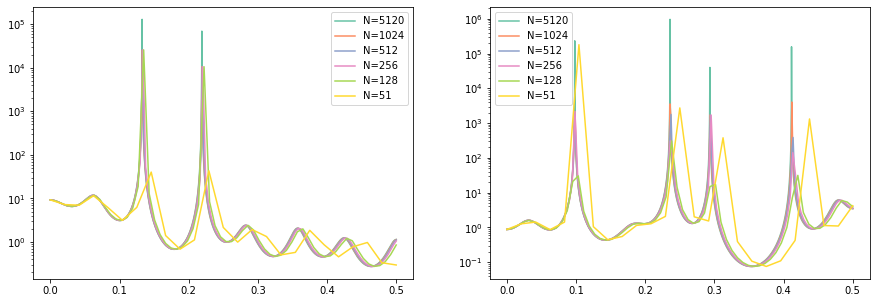

In [6]:
data2 = val2
data3 = val3
n = [0.1, 0.25, 0.5, 1, 2, 10]
p = 15

fig, ax = plt.subplots(1,2)
for N in n[::-1]:
    PSD2 = val2_mem.eval_P(p, int(len(data2)*N))
    PSD2 = PSD2[:len(PSD2)//2]
    
    PSD3 = val3_mem.eval_P(p, int(len(data3)*N))
    PSD3 = PSD3[:len(PSD3)//2]

    omega2 = np.linspace(0, 0.5, PSD2.size)
    omega3 = np.linspace(0, 0.5, PSD3.size)

    ax[0].plot(omega2, abs(PSD2)*2, label="N={}".format(int(N*len(val2))))
    ax[1].plot(omega3, abs(PSD3)*2, label="N={}".format(int(N*len(val3))))

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.show()

Primerjava Hanna fft in za gostoto 1024 MEM pri različnih pjih

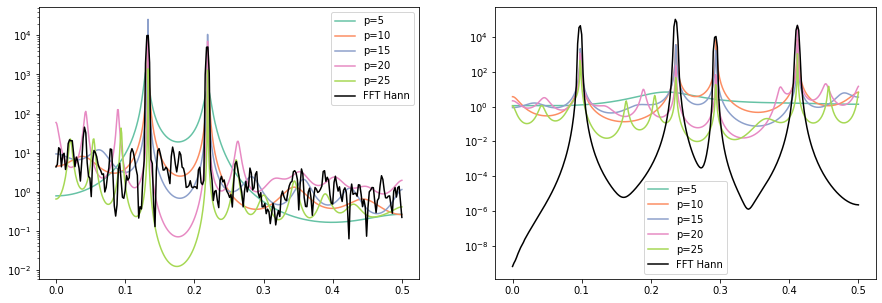

In [7]:
data2 = val2
data3 = val3

pis = [5, 10, 15, 20, 25]

fig, ax = plt.subplots(1,2)
for p in pis:
    PSD2 = val2_mem.eval_P(p, len(data2)*2)
    PSD2 = PSD2[:len(PSD2)//2]

    PSD3 = val3_mem.eval_P(p, len(data3)*2)
    PSD3 = PSD3[:len(PSD3)//2]

    omega2 = np.linspace(0, 0.5, PSD2.size)
    omega3 = np.linspace(0, 0.5, PSD3.size)

    ax[0].plot(omega2, abs(PSD2)*2, label="p={}".format(p))
    ax[1].plot(omega3, abs(PSD3)*2, label="p={}".format(p))

P2 = ft_val2.MOC(okna.hann)
P3 = ft_val3.MOC(okna.hann)
x = np.linspace(0, 0.5, 256)
ax[0].plot(x, P2, c="black", label="FFT Hann")
ax[1].plot(x, P3, c="black", label="FFT Hann")

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.show()

Primerjava fft in Hann z različnimi gostotami


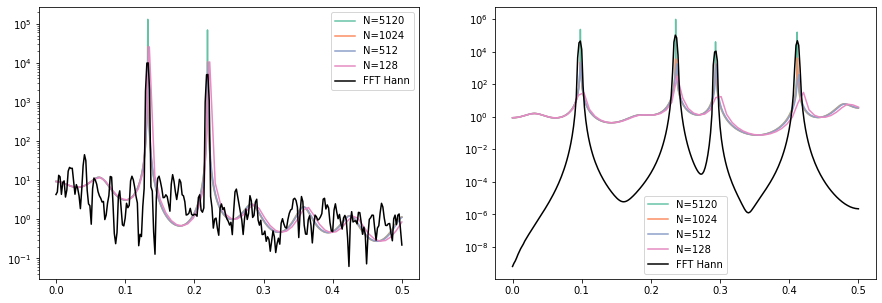

In [8]:
data2 = val2
data3 = val3

n = [0.25, 1, 2, 10]
p = 15

fig, ax = plt.subplots(1,2)
for N in n[::-1]:
    PSD2 = val2_mem.eval_P(p, int(len(data2)*N))
    PSD2 = PSD2[:len(PSD2)//2]

    PSD3 = val3_mem.eval_P(p, int(len(data3)*N))
    PSD3 = PSD3[:len(PSD3)//2]

    omega2 = np.linspace(0, 0.5, PSD2.size)
    omega3 = np.linspace(0, 0.5, PSD3.size)

    ax[0].plot(omega2, abs(PSD2)*2, label="N={}".format(int(N*len(val2))))
    ax[1].plot(omega3, abs(PSD3)*2, label="N={}".format(int(N*len(val3))))

P2 = ft_val2.MOC(okna.hann)
P3 = ft_val3.MOC(okna.hann)

x = np.linspace(0, 0.5, 256)
ax[0].plot(x, P2, c="black", label="FFT Hann")
ax[1].plot(x, P3, c="black", label="FFT Hann")

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()

plt.show()

Letna količina CO2 v zraku

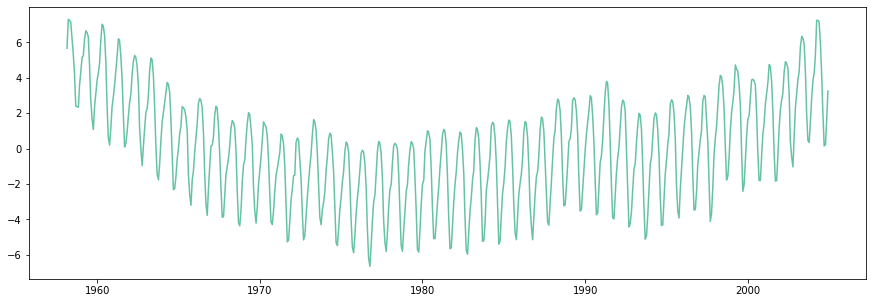

In [9]:
data = np.loadtxt("co2.dat")
data = np.delete(data, np.where(data[:,1]<0),0)
time, co2 = data[:,0], data[:,1]

# odstejem linearno narascanje podatkom
koef = np.polyfit(time, co2, 1)
co2 = co2 - koef[0]*time - koef[1]


plt.plot(time, co2)

plt.show()

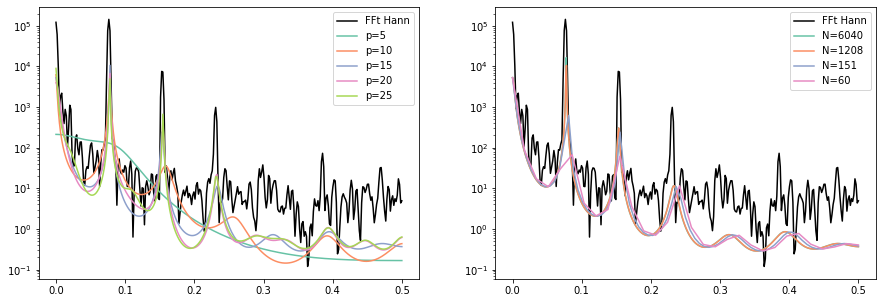

In [10]:
data = co2
ft_co2 = fourier_transform(co2)
P = ft_co2.MOC(okna.hann)
co2_mem = MaksimalnaEntropija(co2)

fig, ax = plt.subplots(1,2)

x = np.linspace(0, 0.5, len(P))
ax[0].plot(x, P, c= "black", label="FFt Hann")
ax[1].plot(x, P, c= "black", label="FFt Hann")

pis = [5, 10, 15, 20, 25]
for p in pis:
    PSD = co2_mem.eval_P(p, len(data))
    PSD = PSD[:len(PSD)//2]

    omega = np.linspace(0, 0.5, PSD.size)
    ax[0].plot(omega, abs(PSD)*2, label="p={}".format(p))

n = [0.1, 0.25, 2, 10]
p = 15
for N in n[::-1]:
    PSD = co2_mem.eval_P(p, int(len(data)*N))
    PSD = PSD[:len(PSD)//2]
    
    omega = np.linspace(0, 0.5, PSD.size)
    ax[1].plot(omega, abs(PSD)*2, label="N={}".format(int(N*len(co2))))

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].legend()
ax[1].legend()
plt.show()

Kje ležijo poli znotraj enotske krožnice pri CO2

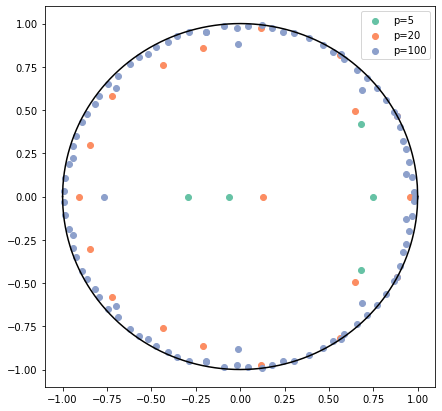

In [11]:
plt.rcParams["figure.figsize"] = (7,7)

pis = [5, 20, 100]
p = 200

x = np.linspace(-1, 1, 1000)
plt.plot(x, np.sqrt(1-x**2), "black")
plt.plot(x, -np.sqrt(1-x**2), "black")

for p in pis:
    a_co2 = co2_mem.koeficienti_a(p)

    a_coef = a_co2[::-1]
    a_coef = np.append(a_coef, 1)

    zeros = np.roots(np.append(a_co2[::-1],1)[::-1])
    plt.scatter(np.real(zeros), np.imag(zeros), label="p={}".format(p))

plt.legend()
plt.show()

Testni signal

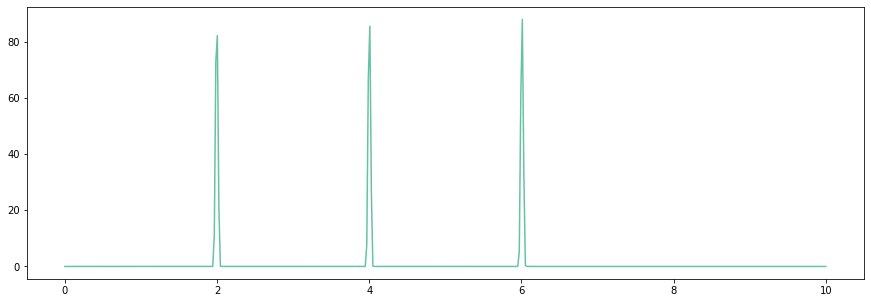

In [57]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / 20.0
x = np.linspace(0.0, N*T, N)

y = np.sin(2*2.0*np.pi*x) + np.sin(4*2.0*np.pi*x) + np.sin(6*2.0*np.pi*x)

yf = fourier_transform(y)
yf = yf.MOC(okna.hann)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

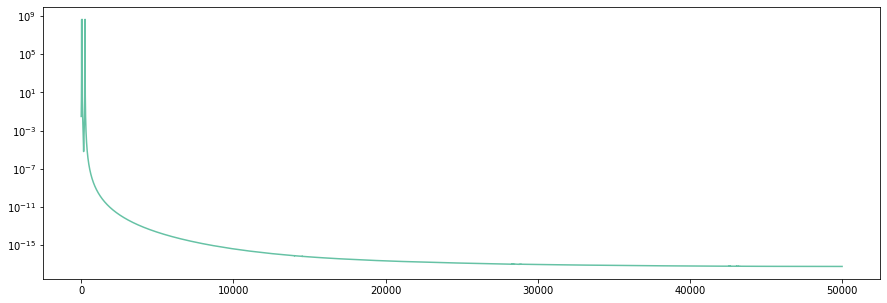

In [49]:
p = 5
t = np.linspace(0, 2*math.pi*8, 2*512)
freq = np.fft.fftfreq(len(t), t[1] - t[0])[0:len(t)//2]

y = np.sin(2*math.pi*t) + np.sin(4*math.pi*t) + np.sin(6*math.pi*t)
mem_test = MaksimalnaEntropija(y)

PSD_test = mem_test.eval_P(p, int(len(y)))
PSD_test = PSD_test[:len(PSD_test)//2]

omegas = np.linspace(0, np.max(freq), len(PSD_test))
plt.plot(omegas, abs(PSD_test))
plt.yscale('log')
plt.show()

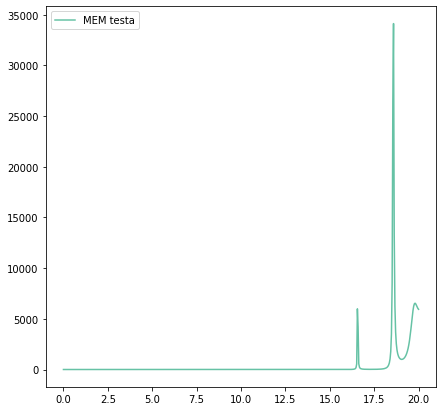

In [13]:
p = 20
t = np.linspace(0, 100, 2*512)
freq = np.fft.fftfreq(len(t), t[1] - t[0])[0:len(t)//2]
y = np.sin(10*math.pi*t) + np.sin(11*math.pi*t) + np.sin(12*math.pi*t)

mem_test = MaksimalnaEntropija(y)
 
PSD_test = mem_test.eval_P(p, int(len(y)))
PSD_test = PSD_test[:len(PSD_test)//2]

omega = np.linspace(0, 200, 512)

plt.plot(omega/10, abs(PSD_test)*2, label="MEM testa")

plt.legend()
plt.show()

## 2. Linearna napoved

In [14]:
def lin_pred(data, p, aji):
    n = len(data)//2
    signal = data[:n]

    for i in range(n):
        y = -np.sum(signal[:-p-1:-1]*aji)
        signal = np.hstack([signal, y])

    return signal

<function matplotlib.pyplot.show(close=None, block=None)>

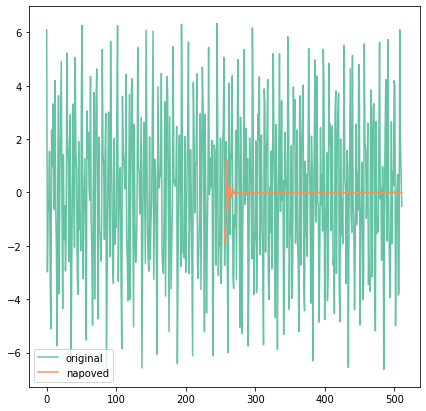

In [15]:
p = 5
data = np.loadtxt("val3.dat")
data_mem = MaksimalnaEntropija(data)

a_data = data_mem.koeficienti_a(p)
nov_data = lin_pred(data, p, a_data)

x1 = np.asarray(range(512))
x2 = np.asarray(range(256, 512))

plt.plot(x1, data, label="original")
plt.plot(x2, nov_data[256:], label="napoved")
plt.legend()
plt.show

In [16]:
def preslikaj(zeros, p):
    nove_nicle = []
    for zero in zeros:
        if np.abs(zero) > 1:
            nicla = zero/np.abs(zero)
        else:
            nicla = zero
        nove_nicle.append(nicla)
    return np.array(nove_nicle)

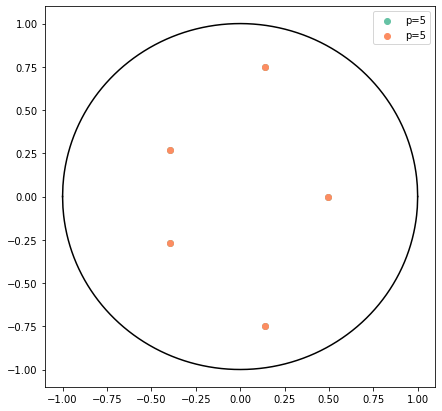

In [17]:
plt.rcParams["figure.figsize"] = (7,7)

p = 5

x = np.linspace(-1, 1, 1000)
plt.plot(x, np.sqrt(1-x**2), "black")
plt.plot(x, -np.sqrt(1-x**2), "black")

a_data = data_mem.koeficienti_a(p)

a_coef = a_data[::-1]
a_coef = np.append(a_coef, 1)

zeros1 = np.roots(np.append(a_data[::-1],1)[::-1])
zeros2 = preslikaj(zeros1, p)

plt.scatter(np.real(zeros1), np.imag(zeros1), label="p={}".format(p))
plt.scatter(np.real(zeros2), np.imag(zeros2), label="p={}".format(p))

plt.legend()

[ 0.57249067  0.19968147 -0.01047415 -0.5644441   0.07475277  0.6023703
  0.30997447 -0.11588863 -0.30722448 -1.02674478]


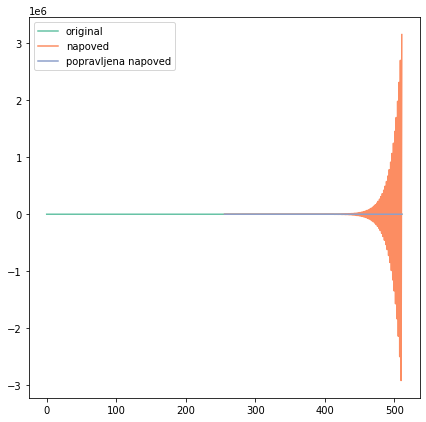

In [18]:
p = 10
a = data_mem.koeficienti_a(p)

nov_data = lin_pred(data, p, a)
nov_data[:256] = [np.nan]*256

x = np.asarray(range(512))

zeros = np.roots(np.append(a[::-1],1)[::-1])
fixed_zeros = preslikaj(zeros, p)

new_a = np.poly(fixed_zeros)[1:]
popravljen_data = lin_pred(data, p, new_a)
popravljen_data[:256] = [np.nan]*256

plt.plot(x, data, label="original")
plt.plot(x, nov_data, label="napoved")
plt.plot(x, popravljen_data, label="popravljena napoved")
plt.legend()
plt.show

print(a)

<function matplotlib.pyplot.show(close=None, block=None)>

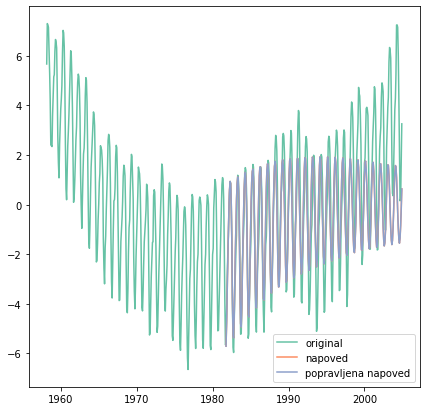

In [19]:
p = 15
data = np.loadtxt("co2.dat")
data = np.delete(data, np.where(data[:,1]<0),0)
time, co2 = data[:,0], data[:,1]

# odstejem linearno narascanje podatkom
koef = np.polyfit(time, co2, 1)
CO2 = co2 - koef[0]*time - koef[1]
data = CO2
data_mem = MaksimalnaEntropija(data)
N = int(len(co2)/2)

a = data_mem.koeficienti_a(p)

nov_data = lin_pred(data, p, a)
nov_data[:N] = [np.nan]*N

zeros = np.roots(np.append(a[::-1],1)[::-1])
fixed_zeros = preslikaj(zeros, p)

new_a = np.poly(fixed_zeros)[1:]
popravljen_data = lin_pred(data, p, new_a)
popravljen_data[:N] = [np.nan]*N

plt.plot(time, data, label="original")
plt.plot(time, nov_data, label="napoved")
plt.plot(time, popravljen_data, label="popravljena napoved")
plt.legend()
plt.show

preverimo kaj se dogaja s poli

In [20]:
def preslikaj_nicle(a):
    nove = []
    for i in range(a.size):
        if abs(a[i]) > 1:
            a[i] = a[i]/abs(a[i])
            np.hstack([nove, a[i]])
    return nove


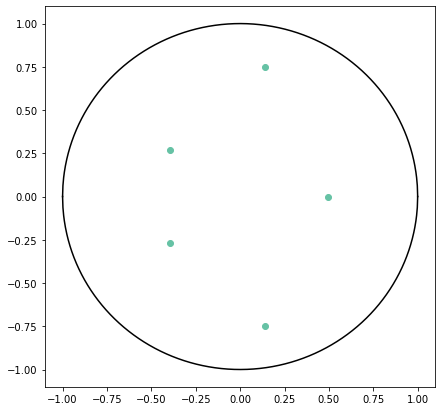

In [21]:
a_coef = a_data[::-1]
a_coef = np.append(a_coef, 1)

x = np.linspace(-1, 1, 1000)
plt.plot(x, np.sqrt(1-x**2), "black")
plt.plot(x, -np.sqrt(1-x**2), "black")

zeros = np.roots(np.append(a_data[::-1],1)[::-1])
plt.scatter(np.real(zeros), np.imag(zeros), label="p={}".format(p))
plt.show()

In [22]:
p = 10
time = np.genfromtxt("luna.dat", usecols=0, dtype='str')
data = np.loadtxt("luna.dat", usecols=2)

<function matplotlib.pyplot.show(close=None, block=None)>

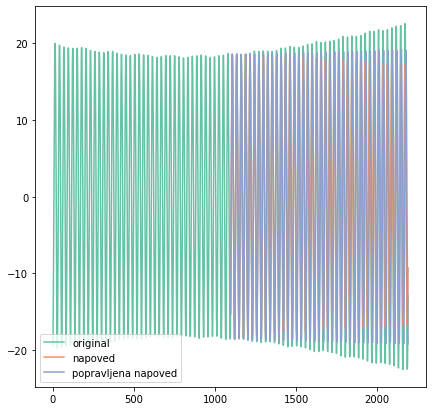

In [38]:
N = len(data)//2
time = np.asarray(range(2*N))
data_mem = MaksimalnaEntropija(data)

p = 60
a = data_mem.koeficienti_a(p)

nov_data = lin_pred(data, p, a)
nov_data[:N] = [np.nan]*N

zeros = np.roots(np.append(a[::-1],1)[::-1])
fixed_zeros = preslikaj(zeros, p)

new_a = np.poly(fixed_zeros)[1:]
popravljen_data = lin_pred(data, p, new_a)
popravljen_data[:N] = [np.nan]*N

plt.plot(time, data, label="original")
plt.plot(time, nov_data, label="napoved")
plt.plot(time, popravljen_data, label="popravljena napoved")
plt.legend()
plt.show